In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
df.shape

(18288, 3)

In [4]:
df.drop(columns='ID',inplace=True)

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'],format='%d-%m-%Y %H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


In [7]:
dels=datetime.timedelta(hours=1)

In [8]:
for i in range(df.shape[0]-1):
    ss=df['Datetime'][i+1]-df['Datetime'][i]
    if ss != dels:
        print(i)
        print(ss)   

In [8]:
df=df.set_index('Datetime').asfreq('H')

In [9]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [10]:
df.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq='H')

In [12]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


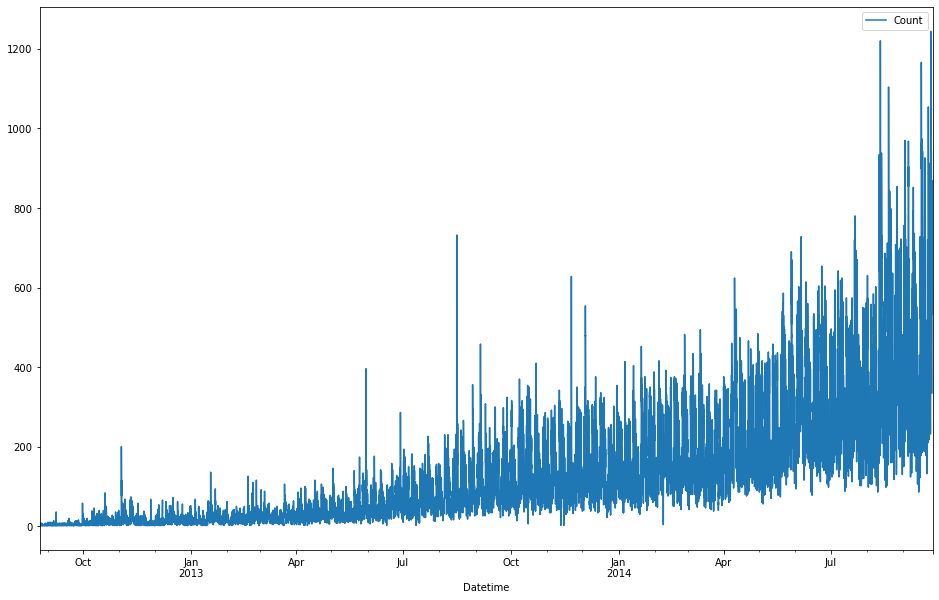

In [13]:
df.plot(figsize = (16, 10))

In [14]:
help(sm.tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

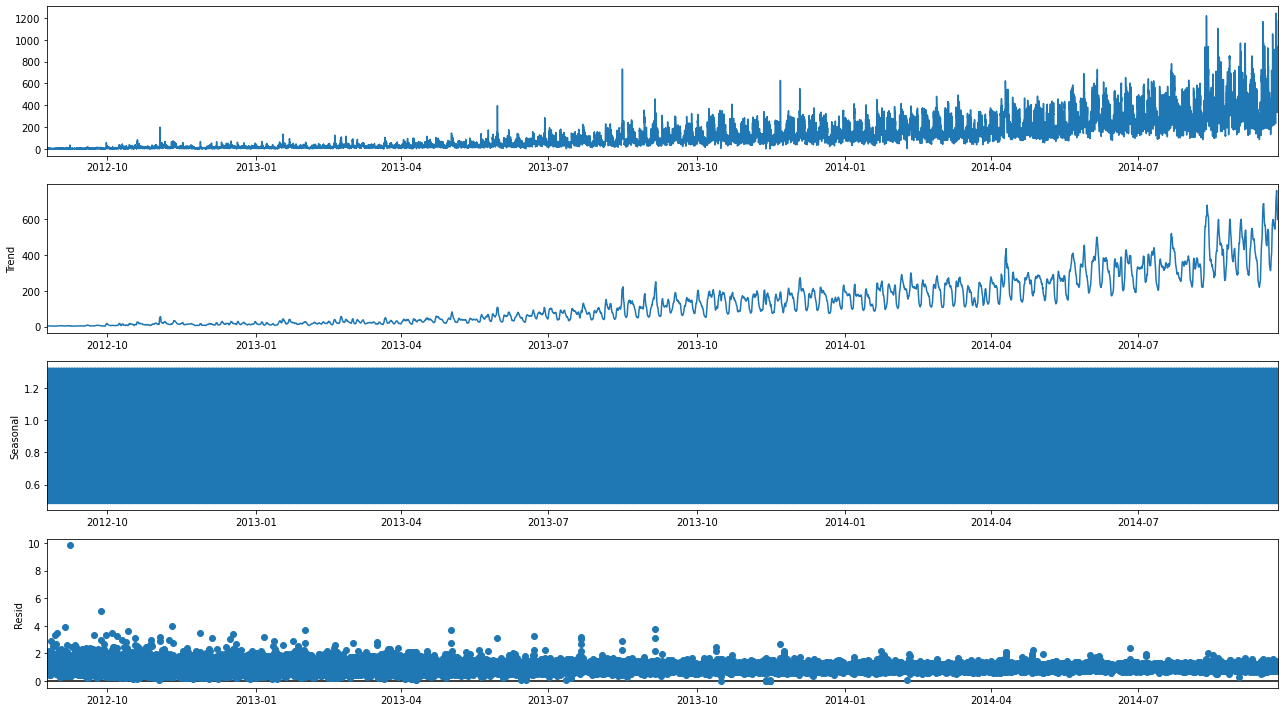

In [25]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(df,  model = 'multiplicative')
fig = decomposition.plot()

In [26]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [27]:
# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/ y_true))*100

## Let's check if the time series is stationary or not using ADF Test

In [23]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(df)

print("P-Value : %0.4f" % adf_test[1])


P-Value : 0.0002


In [19]:
adf_test

(-4.456560536856826,
 0.0002354046646766507,
 45,
 18242,
 {'1%': -3.430708525404171,
  '5%': -2.861698454786869,
  '10%': -2.5668543412994906},
 181026.8337109476)

Since the p-value<0.05, we conclude that the time series is stationary

## Differencing

In [20]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


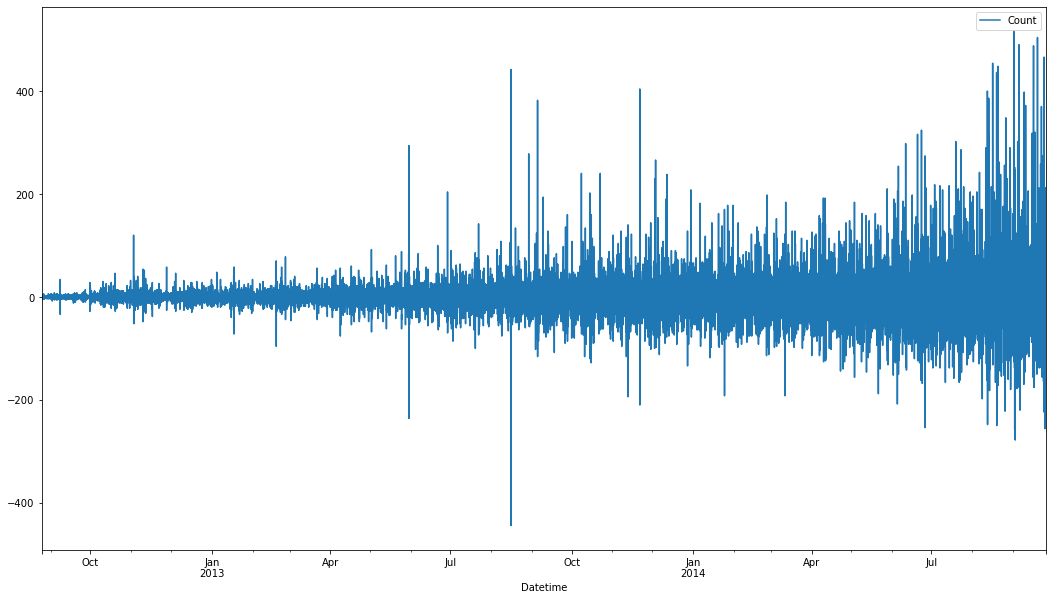

In [28]:
df.diff().plot()

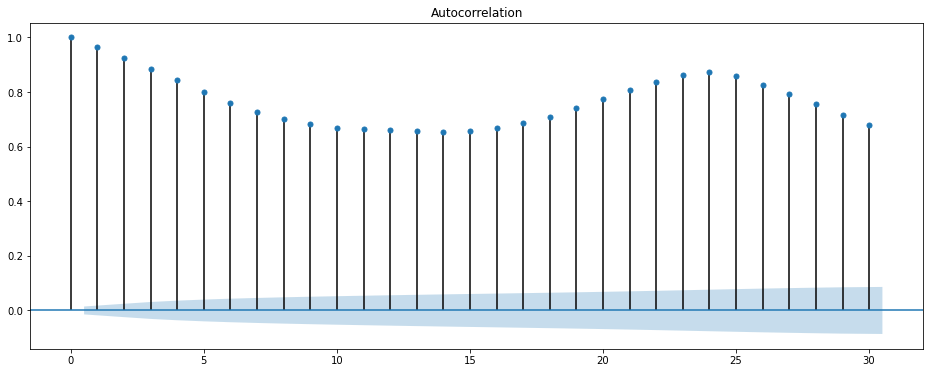

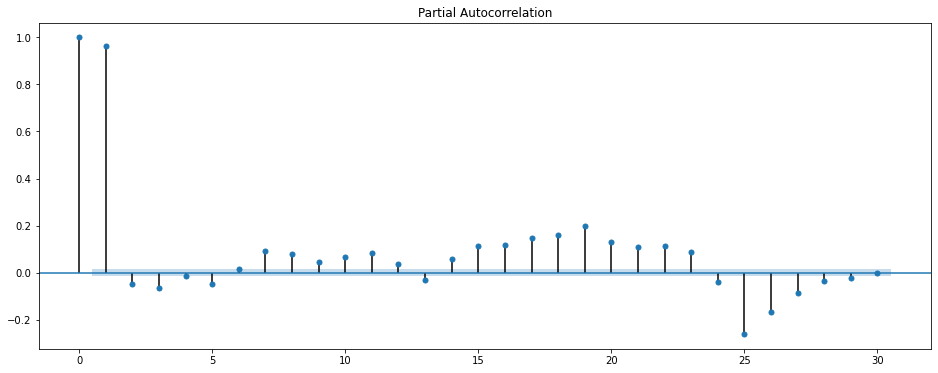

In [33]:
import statsmodels.graphics.tsaplots as tsa
rcParams['figure.figsize'] = 16, 6
tsa.plot_acf(df, lags = 30)
tsa.plot_pacf(df, lags = 30)
plt.show()

p = 29
d = 0
q = 0

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order = (29, 0, 0) )
result_arima = model.fit()

In [36]:
predictions = result_arima.predict(typ = 'levels')
predictions

Datetime
2012-08-25 00:00:00    143.498806
2012-08-25 01:00:00     12.765012
2012-08-25 02:00:00      6.923457
2012-08-25 03:00:00     11.224304
2012-08-25 04:00:00      7.635982
                          ...    
2014-09-25 19:00:00    752.131499
2014-09-25 20:00:00    808.427417
2014-09-25 21:00:00    699.744008
2014-09-25 22:00:00    669.675874
2014-09-25 23:00:00    574.548737
Freq: H, Length: 18288, dtype: float64

In [37]:
df_arima = df.copy()
df_arima['ARIMA'] = predictions

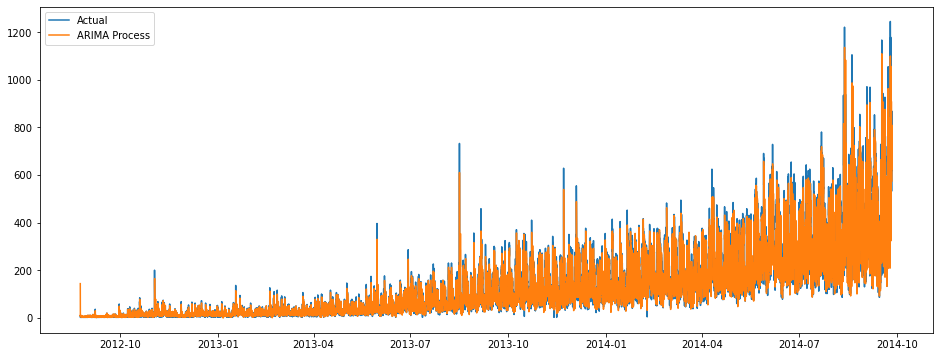

In [38]:
plt.plot(df_arima['Count'], label = 'Actual')
plt.plot(df_arima['ARIMA'], label = 'ARIMA Process')
plt.legend()

In [40]:
mape(df_arima['Count'], df_arima['ARIMA'])

32.738757483081734

In [41]:
df.shape

(18288, 1)

In [44]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [42]:
df.tail()

,Count
Datetime,
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702
2014-09-25 22:00:00,580
2014-09-25 23:00:00,534


In [64]:
predictions = result_arima.predict(start=18288, end=18288+5111, typ = 'levels')
predictions

2014-09-26 00:00:00    444.041319
2014-09-26 01:00:00    354.200386
2014-09-26 02:00:00    298.298294
2014-09-26 03:00:00    248.635237
2014-09-26 04:00:00    199.518813
                          ...    
2015-04-26 19:00:00    143.498806
2015-04-26 20:00:00    143.498806
2015-04-26 21:00:00    143.498806
2015-04-26 22:00:00    143.498806
2015-04-26 23:00:00    143.498806
Freq: H, Length: 5112, dtype: float64

In [65]:
sub= pd.read_csv('sample_submission.csv')
sub['Count']= list(predictions)

In [70]:
sub.head()

,ID,Count
0,18288,444.041319
1,18289,354.200386
2,18290,298.298294
3,18291,248.635237
4,18292,199.518813


In [71]:
sub.to_csv(r"sample_submission.csv", index=False)

# RNN

In [210]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import math

In [274]:
df.shape

(18288, 1)

In [275]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [276]:
df.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [277]:
dataset = df.values
dataset = dataset.astype('float32')

In [278]:
scaler= StandardScaler()
dataset = scaler.fit_transform(dataset)

In [279]:
dataset

array([[-0.85335153],
       [-0.89244884],
       [-0.86638397],
       ...,
       [ 3.668903  ],
       [ 2.873925  ],
       [ 2.574179  ]], dtype=float32)

In [280]:
part= int(len(dataset)*0.8)
train_df= dataset[:part]
test_df= dataset[part:]

In [281]:
np.random.seed(5)

In [282]:
len(df), len(train_df), len(test_df) 

(18288, 14630, 3658)

In [288]:
def error(model):
    train_y_pred= model.predict(train_x)
    test_y_pred = model.predict(test_x)
    trainscore = math.sqrt(mean_squared_error(train_y_pred, train_y))
    testscore = math.sqrt(mean_squared_error(test_y_pred, test_y))
    print('train RMSE is ', trainscore)
    print('test RMSE is ', testscore)

In [286]:
look_back= 8

train_x,train_y= create_dataset(train_df, look_back=look_back)
test_x,test_y= create_dataset(test_df, look_back=look_back)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

model_1 = Sequential()
model_1.add(LSTM(6, input_shape=(1, look_back)))
model_1.add(Dense(1))
model_1.compile(loss='mean_squared_error', optimizer='adam')
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 6)                 360       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [287]:
model_1.fit(train_x, train_y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
457/457 [==============================] - 5s 3ms/step - loss: 0.1406
Epoch 2/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 3/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0330
Epoch 4/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0317
Epoch 5/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0309
Epoch 6/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0312
Epoch 7/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0281
Epoch 8/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0304
Epoch 9/10
457/457 [==============================] - 2s 3ms/step - loss: 0.0317
Epoch 10/10
457/457 [==============================] - 1s 3ms/step - loss: 0.0301


In [289]:
error(model_1)

train RMSE is  0.17123214293573363
test RMSE is  0.7408238381448492


In [310]:
look_back= 6

train_x,train_y= create_dataset(train_df, look_back=look_back)
test_x,test_y= create_dataset(test_df, look_back=look_back)

train_x = np.reshape(train_x, (train_x.shape[0],1,train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0],1,test_x.shape[1]))

model_2 = Sequential()
model_2.add(LSTM(4, input_shape=(1,look_back)))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')
model_2.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 80)                21120     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 81        
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [311]:
model_2.fit(train_x, train_y, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
457/457 [==============================] - 2s 2ms/step - loss: 0.1006
Epoch 2/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0316
Epoch 3/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0307
Epoch 4/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0320
Epoch 5/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 6/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0338
Epoch 7/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0298
Epoch 8/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0303
Epoch 9/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0303
Epoch 10/10
457/457 [==============================] - 1s 2ms/step - loss: 0.0313


In [312]:
error(model_2)

train RMSE is  0.1748742545877512
test RMSE is  0.5776586971793474


In [346]:
look_back= 6

train_x,train_y= create_dataset(train_df, look_back=look_back)
test_x,test_y= create_dataset(test_df, look_back=look_back)

train_x = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1],1))

model_3 = Sequential()
model_3.add(LSTM(80, batch_input_shape=(1,look_back,1), stateful=True))
model_3.add(Dense(1))
model_3.compile(loss='mean_squared_error', optimizer='adam')
model_3.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (1, 80)                   26240     
_________________________________________________________________
dense_67 (Dense)             (1, 1)                    81        
Total params: 26,321
Trainable params: 26,321
Non-trainable params: 0
_________________________________________________________________


In [347]:
for i in range(10):
    model_3.fit(train_x, train_y, epochs=1, batch_size=1, verbose=2, shuffle=False)
    model_3.reset_states()

14623/14623 - 59s - loss: 0.0318
14623/14623 - 54s - loss: 0.0300
14623/14623 - 55s - loss: 0.0294
14623/14623 - 57s - loss: 0.0291
14623/14623 - 59s - loss: 0.0288
14623/14623 - 55s - loss: 0.0286
14623/14623 - 56s - loss: 0.0284
14623/14623 - 56s - loss: 0.0282
14623/14623 - 59s - loss: 0.0282
14623/14623 - 54s - loss: 0.0281


In [348]:
def error_1(model):
    train_y_pred= model.predict(train_x,batch_size=1)
    test_y_pred = model.predict(test_x,batch_size=1)
    trainscore = math.sqrt(mean_squared_error(train_y_pred, train_y))
    testscore = math.sqrt(mean_squared_error(test_y_pred, test_y))
    print('train RMSE is ', trainscore)
    print('test RMSE is ', testscore)

In [349]:
error_1(model_3)

train RMSE is  0.2628397491335626
test RMSE is  0.641237477855109


In [313]:
look_back= 6
lstmm= [4,10,20,40,60,80,100,200]
for ll in lstmm:
    train_x,train_y= create_dataset(train_df, look_back=look_back)
    test_x,test_y= create_dataset(test_df, look_back=look_back)
    
    train_x = np.reshape(train_x, (train_x.shape[0],1,train_x.shape[1]))
    test_x = np.reshape(test_x, (test_x.shape[0],1,test_x.shape[1]))
    
    model = Sequential()
    model.add(GRU(ll, input_shape=(1,look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(train_x, train_y, epochs=10, batch_size=32, verbose=0)
    
    print('lstm-',ll)
    error(model)
    print('\n')

lstm- 4
train RMSE is  0.17636459302208432
test RMSE is  0.7808704217050191


lstm- 10
train RMSE is  0.1743607397896915
test RMSE is  0.6663462022602878


lstm- 20
train RMSE is  0.17396618685916423
test RMSE is  0.6066669298746076


lstm- 40
train RMSE is  0.17581996491386603
test RMSE is  0.6111601577448945


lstm- 60
train RMSE is  0.1736738345301186
test RMSE is  0.5849730628895107


lstm- 80
train RMSE is  0.17828831965398406
test RMSE is  0.5413852351790479


lstm- 100
train RMSE is  0.17395547423801885
test RMSE is  0.5860539892749712


lstm- 200
train RMSE is  0.17659280778481304
test RMSE is  0.6054709157597354




In [316]:
dataset

array([[-0.85335153],
       [-0.89244884],
       [-0.86638397],
       ...,
       [ 3.668903  ],
       [ 2.873925  ],
       [ 2.574179  ]], dtype=float32)

# for submission

In [350]:
pred=[]
for i in range(look_back,0,-1):
    pred.append(dataset[-i,0])
    
for i in range(5112):
    eg= np.array(pred[i:(i+look_back)])
    eg= eg.reshape(1,look_back,1)
    y_pred= model_3.predict(eg)
    pred.append(y_pred[0][0])

In [351]:
len(pred)

5118

In [352]:
final= pred[look_back:]

In [353]:
real = scaler.inverse_transform([final])

In [354]:
real[0]

array([425.50287, 399.682  , 388.09067, ..., 205.44453, 188.9379 ,
       173.17572], dtype=float32)

In [355]:
real.shape

(1, 5112)

In [356]:
sub= pd.read_csv('sample_submission.csv')
sub['Count']= list(real[0])

In [357]:
sub.head()

,ID,Count
0,18288,425.502869
1,18289,399.682007
2,18290,388.090668
3,18291,377.425354
4,18292,360.499817


In [358]:
sub['Count']= sub['Count'].apply(lambda x : int(round(x,0)))


In [359]:
sub.to_csv(r"sample_submission.csv", index=False)

In [360]:
sub.head()

,ID,Count
0,18288,426
1,18289,400
2,18290,388
3,18291,377
4,18292,360


In [361]:
(sub['Count']<0).sum()

0